# RETAIL PROFIT ANALYSIS 
Presented By :- Rahil Deshmukh

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

data = pd.read_csv(r"C:\Users\Rahil\Desktop\stores_sales_forecasting.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [3]:
# Creating a copy of the dataset to perform further data pre-processing and EDA 
df = data.copy()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [4]:
# Dropping unnecessary columns 
df.drop(columns = ['Row ID','Order ID','Customer ID','Customer Name','Postal Code','Product ID'], inplace=True)

In [5]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    2121 non-null   object 
 1   Ship Date     2121 non-null   object 
 2   Ship Mode     2121 non-null   object 
 3   Segment       2121 non-null   object 
 4   Country       2121 non-null   object 
 5   City          2121 non-null   object 
 6   State         2121 non-null   object 
 7   Region        2121 non-null   object 
 8   Category      2121 non-null   object 
 9   Sub-Category  2121 non-null   object 
 10  Product Name  2121 non-null   object 
 11  Sales         2121 non-null   float64
 12  Quantity      2121 non-null   int64  
 13  Discount      2121 non-null   float64
 14  Profit        2121 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 248.7+ KB


In [7]:
# Checking if there are any null values
df.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values present in the dataset

In [8]:
# Checking if the dataset contain any duplicate row
df.duplicated().sum()

1

There is 1 duplicate row in our dataset. We shall delete that !!

In [9]:
# Dropping the duplicate row 
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

There are no duplicates now

In [11]:
# Statistical description of the dataset
df.describe()

,Sales,Quantity,Discount,Profit
count,2120.000000,2120.000000,2120.000000,2120.000000
mean,349.867181,3.785849,0.173863,8.709119
std,503.295663,2.251818,0.181569,136.080597
min,1.892000,1.000000,0.000000,-1862.312400
25%,47.040000,2.000000,0.000000,-12.856350
50%,182.103000,3.000000,0.200000,7.782200
75%,435.168000,5.000000,0.300000,33.757875
max,4416.174000,14.000000,0.700000,1013.127000


In [12]:
# Since the data type of the Order date and Ship date column is object, We will change it to date-time format

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df[['Order Date','Ship Date']]

<ipython-input-12-0824b3362bb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-12-0824b3362bb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2015-10-11,2015-10-18
3,2014-06-09,2014-06-14
4,2014-06-09,2014-06-14
...,...,...
2116,2015-03-19,2015-03-22
2117,2016-12-05,2016-12-10
2118,2015-09-06,2015-09-09
2119,2014-01-21,2014-01-23


In [13]:
# Arranging the dataset in ascending order of 'Order Date'
df = df.sort_values(by='Order Date', ascending=True)
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,2014-01-06,2014-01-10,Standard Class,Home Office,United States,Henderson,Kentucky,South,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
1626,2014-01-07,2014-01-12,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,Virginia,South,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,2014-01-11,2014-01-14,First Class,Consumer,United States,Dover,Delaware,East,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
631,2014-01-13,2014-01-16,Second Class,Consumer,United States,Mount Pleasant,South Carolina,South,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2017-12-29,2018-01-01,Second Class,Consumer,United States,Louisville,Kentucky,South,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
1617,2017-12-29,2018-01-01,Second Class,Consumer,United States,Louisville,Kentucky,South,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
1057,2017-12-29,2018-01-05,Standard Class,Corporate,United States,Anaheim,California,West,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144
1618,2017-12-29,2018-01-01,Second Class,Consumer,United States,Louisville,Kentucky,South,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842


In [14]:
# Checking the relationship of different variables with respect to each other
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.437479,-0.028534,0.173502
Quantity,0.437479,1.000000,-0.015439,0.061165
Discount,-0.028534,-0.015439,1.000000,-0.483776
Profit,0.173502,0.061165,-0.483776,1.000000


In [15]:
df['Order Month-Year'] = df['Order Date'].dt.strftime('%m-%Y')
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month-Year
1577,2014-01-06,2014-01-10,Standard Class,Home Office,United States,Henderson,Kentucky,South,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,01-2014
1626,2014-01-07,2014-01-12,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,01-2014
181,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,Virginia,South,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,01-2014
150,2014-01-11,2014-01-14,First Class,Consumer,United States,Dover,Delaware,East,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,01-2014
631,2014-01-13,2014-01-16,Second Class,Consumer,United States,Mount Pleasant,South Carolina,South,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,01-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2017-12-29,2018-01-01,Second Class,Consumer,United States,Louisville,Kentucky,South,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,12-2017
1617,2017-12-29,2018-01-01,Second Class,Consumer,United States,Louisville,Kentucky,South,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384,12-2017
1057,2017-12-29,2018-01-05,Standard Class,Corporate,United States,Anaheim,California,West,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,12-2017
1618,2017-12-29,2018-01-01,Second Class,Consumer,United States,Louisville,Kentucky,South,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,12-2017


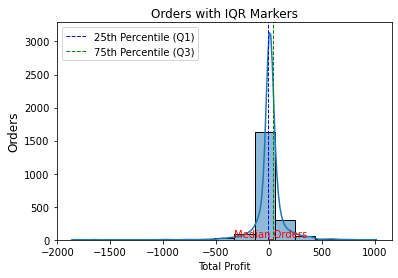

In [16]:
# Profit distibution

# Calculate IQR
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
median = df['Profit'].median()

# Plot
sns.histplot(df['Profit'], bins=15, kde=True)
plt.axvline(Q1, color='blue', linestyle='dashed', linewidth=1, label='25th Percentile (Q1)')
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=1, label='75th Percentile (Q3)')
plt.hlines(y=0, xmin=Q1, xmax=Q3, color='red', linestyle='dashed', linewidth=2,)
plt.text((Q1 + Q3)/2 , 10, 'Median Orders', color='red', ha='center', va='bottom')


# title and labels
plt.title('Orders with IQR Markers')
plt.xlabel('Total Profit')
plt.ylabel('Orders', fontsize=12)
plt.legend()
plt.show()

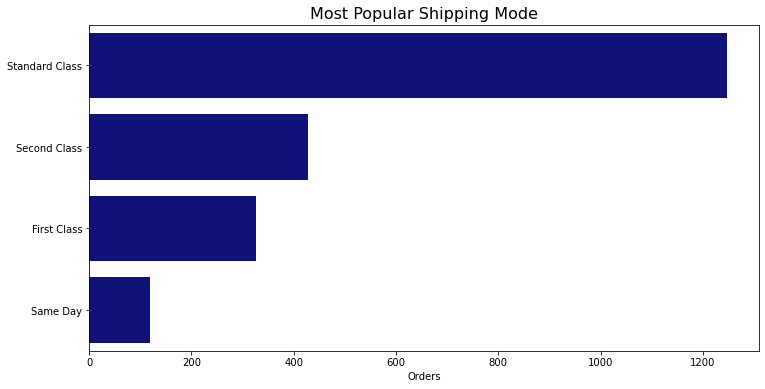

In [17]:
# Most popular Shipping Mode

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Ship Mode', order=data['Ship Mode'].value_counts().index,color='darkblue')
plt.title('Most Popular Shipping Mode', fontsize=16)
plt.xlabel('Orders')
plt.ylabel('')
plt.show()

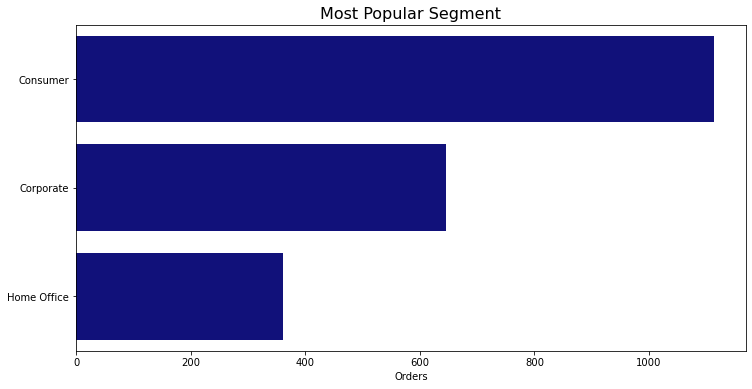

In [18]:
# Most popular segment

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Segment', order=data['Segment'].value_counts().index,color='darkblue')
plt.title('Most Popular Segment', fontsize=16)
plt.xlabel('Orders')
plt.ylabel('')
plt.show()

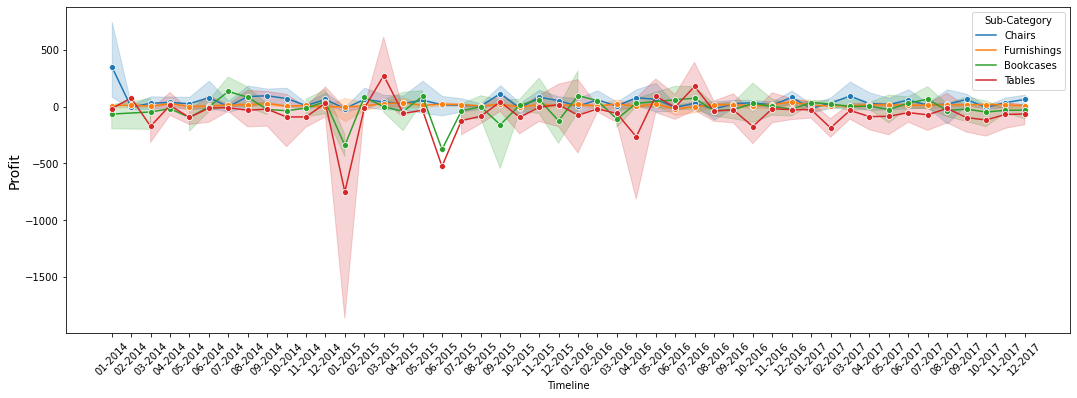

In [19]:
# Profit trends by sub-category over time

plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='Order Month-Year', y='Profit', hue='Sub-Category', marker='o')
plt.xlabel('Timeline') 
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [20]:
# Average Profit per region 

Mean_Profit_Per_Region = data.groupby('Region')['Profit'].mean().reset_index()

Mean_Profit_Per_Region.columns = ['Region', 'Mean Profit']

Mean_Profit_Per_Region = Mean_Profit_Per_Region.sort_values(by='Mean Profit', ascending=False).reset_index(drop=True)

Mean_Profit_Per_Region.index = range(1,5)
Mean_Profit_Per_Region

,Region,Mean Profit
1,South,20.395199
2,West,16.272914
3,East,5.068496
4,Central,-5.968918


In [21]:
# Checking the correlation between discount and profit

correlation = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {correlation}")

Correlation between Discount and Profit: -0.4837764785777126


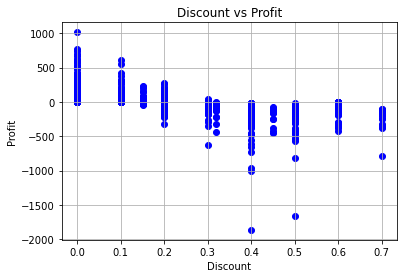

In [22]:
# Visualising the correlation

plt.scatter(df['Discount'], df['Profit'], color='blue')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid()
plt.show()

In [23]:
# Spearman Correlation

spearman_corr = df['Discount'].corr(df['Profit'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: -0.7227960137296034


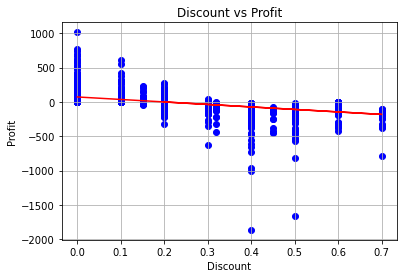

In [24]:
# Fitting a Regression Line

import numpy as np
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(df['Discount'], df['Profit'], 1)
plt.scatter(df['Discount'], df['Profit'], color='blue')
plt.plot(df['Discount'], m * df['Discount'] + b, color='red')  # Regression line
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid()
plt.show()


In [28]:
# Sales V/S Discount


# Calculate Pearson correlation
correlation = df['Sales'].corr(df['Discount'])
print(f"Pearson Correlation: {correlation}")

# For Spearman Correlation
spearman_correlation = df['Sales'].corr(df['Discount'], method='spearman')
print(f"Spearman Correlation: {spearman_correlation}")


Pearson Correlation: -0.02853434801134815
Spearman Correlation: 0.09305976135648235


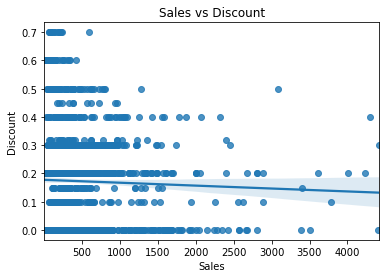

In [29]:
sns.regplot(x='Sales', y='Discount', data=df)
plt.title('Sales vs Discount')
plt.show()


<ipython-input-59-17117a711e0b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df2["Sub-Category"], rotation=45, ha="right")


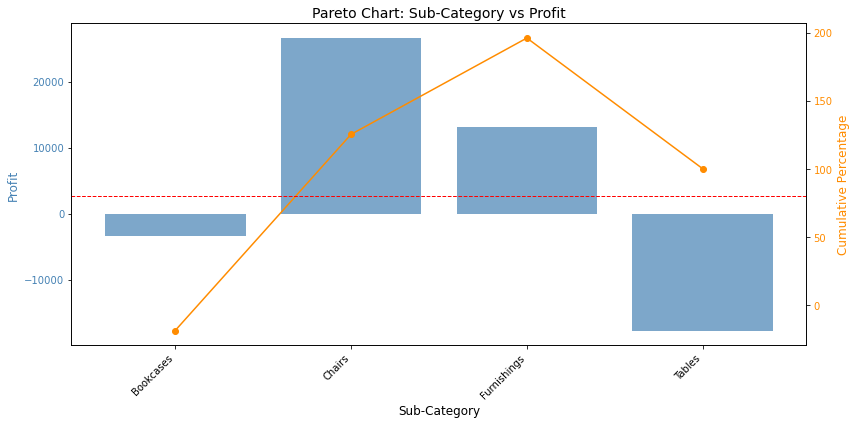

In [59]:
# Pareto Chart : Sub-Category V/S Profit


# Calculate cumulative profit percentage
df1 = df.sort_values(by='Profit',ascending=False)
df2 = df1.groupby('Sub-Category')['Profit'].sum().reset_index()
df2

df2["Cumulative Profit"] = df2["Profit"].cumsum()
df2["Cumulative Percentage"] = (df2["Cumulative Profit"] / df2["Profit"].sum()) * 100

# Plot the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for profits
ax1.bar(df2["Sub-Category"], df2["Profit"], color="steelblue", alpha=0.7)
ax1.set_xlabel("Sub-Category", fontsize=12)
ax1.set_ylabel("Profit", fontsize=12, color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.set_title("Pareto Chart: Sub-Category vs Profit", fontsize=14)
ax1.set_xticklabels(df2["Sub-Category"], rotation=45, ha="right")

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df2["Sub-Category"], df2["Cumulative Percentage"], color="darkorange", marker="o", linestyle="-")
ax2.set_ylabel("Cumulative Percentage", fontsize=12, color="darkorange")
ax2.tick_params(axis="y", labelcolor="darkorange")
ax2.axhline(80, color="red", linestyle="--", linewidth=1)  # Add 80% reference line

# Show the plot
plt.tight_layout()
plt.show()


In [60]:
# Top 5 Profitable States

top_5_profitable_states = df.sort_values(by='Profit', ascending=False).head(5)

print("Top 5 Profitable States:")
top_5_profitable_states[['State', 'Profit']]

Top 5 Profitable States:


,State,Profit
2063,Vermont,1013.1270
1452,Minnesota,770.3520
1577,Kentucky,746.4078
1070,Michigan,700.9800
366,Wisconsin,673.8816


In [61]:
# Top 5 Profitable Cities

top_5_profitable_cities = df.sort_values(by='Profit', ascending=False).head(5)

print("Top 5 Profitable Cities:")
top_5_profitable_states[['City', 'Profit']]

Top 5 Profitable Cities:


,City,Profit
2063,Burlington,1013.1270
1452,Minneapolis,770.3520
1577,Henderson,746.4078
1070,Detroit,700.9800
366,Madison,673.8816


In [62]:
# Segmentation analysis of sub-categories

grouped_df = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Define thresholds for categorization
sales_threshold = grouped_df['Sales'].median()  # Median sales as threshold
profit_threshold = grouped_df['Profit'].median()  # Median profit as threshold

# Function to categorize each sub-category
def categorize(row):
    if row['Sales'] >= sales_threshold and row['Profit'] >= profit_threshold:
        return 'High Sales High Profit'
    elif row['Sales'] >= sales_threshold and row['Profit'] < profit_threshold:
        return 'High Sales Low Profit'
    elif row['Sales'] < sales_threshold and row['Profit'] >= profit_threshold:
        return 'Low Sales High Profit'
    else:
        return 'Low Sales Low Profit'

# Apply the categorization
grouped_df['Segment'] = grouped_df.apply(categorize, axis=1)
grouped_df.index = range(1,5)
grouped_df

,Sub-Category,Sales,Profit,Segment
1,Bookcases,114879.9963,-3472.5560,Low Sales Low Profit
2,Chairs,328167.7310,26602.2251,High Sales High Profit
3,Furnishings,91705.1640,13059.1436,Low Sales High Profit
4,Tables,206965.5320,-17725.4811,High Sales Low Profit
